### Etapa 3 Integrador

El sector de Marketing requiere de un análisis exhaustivo sobre sus campañas lanzadas, cuentan con un dato que denominan “conversión” y tiene que ver con que si un cliente, hizo un consumo, en base a la campaña que se le hizo llegar. Ese dato nos dice el grado de efectividad de las campañas. 
El requisito es la creación de un modelo predictivo que logre predecir la efectividad de una campaña en base a sus características.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Análisis Exploratorio

In [2]:
df = pd.read_csv("Datasets/conversiones.csv")

In [3]:
df.head()

,Costo1,Costo2,Topico,Quincena,TipoProducto,Conversion
0,0.341,0.299,2,7,1,Si
1,0.151,0.079,2,8,1,Si
2,0.384,0.324,4,9,1,Si
3,0.200,0.192,4,9,1,Si
4,0.415,0.020,2,8,1,Si


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319946 entries, 0 to 319945
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Costo1        319946 non-null  float64
 1   Costo2        319946 non-null  float64
 2   Topico        319946 non-null  int64  
 3   Quincena      319946 non-null  int64  
 4   TipoProducto  319946 non-null  int64  
 5   Conversion    319946 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 14.6+ MB


In [5]:
df.isna().sum()

Costo1          0
Costo2          0
Topico          0
Quincena        0
TipoProducto    0
Conversion      0
dtype: int64

In [6]:
df.describe()

,Costo1,Costo2,Topico,Quincena,TipoProducto
count,319946.000000,319946.000000,319946.000000,319946.000000,319946.000000
mean,0.349474,0.361730,2.966194,12.845168,4.502994
std,0.270063,0.278102,1.172870,6.493443,2.179622
min,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.134000,0.138000,2.000000,7.000000,3.000000
50%,0.273000,0.280000,3.000000,13.000000,5.000000
75%,0.502000,0.556000,4.000000,19.000000,6.000000
max,1.000000,1.000000,5.000000,24.000000,8.000000


#### Distribuciones

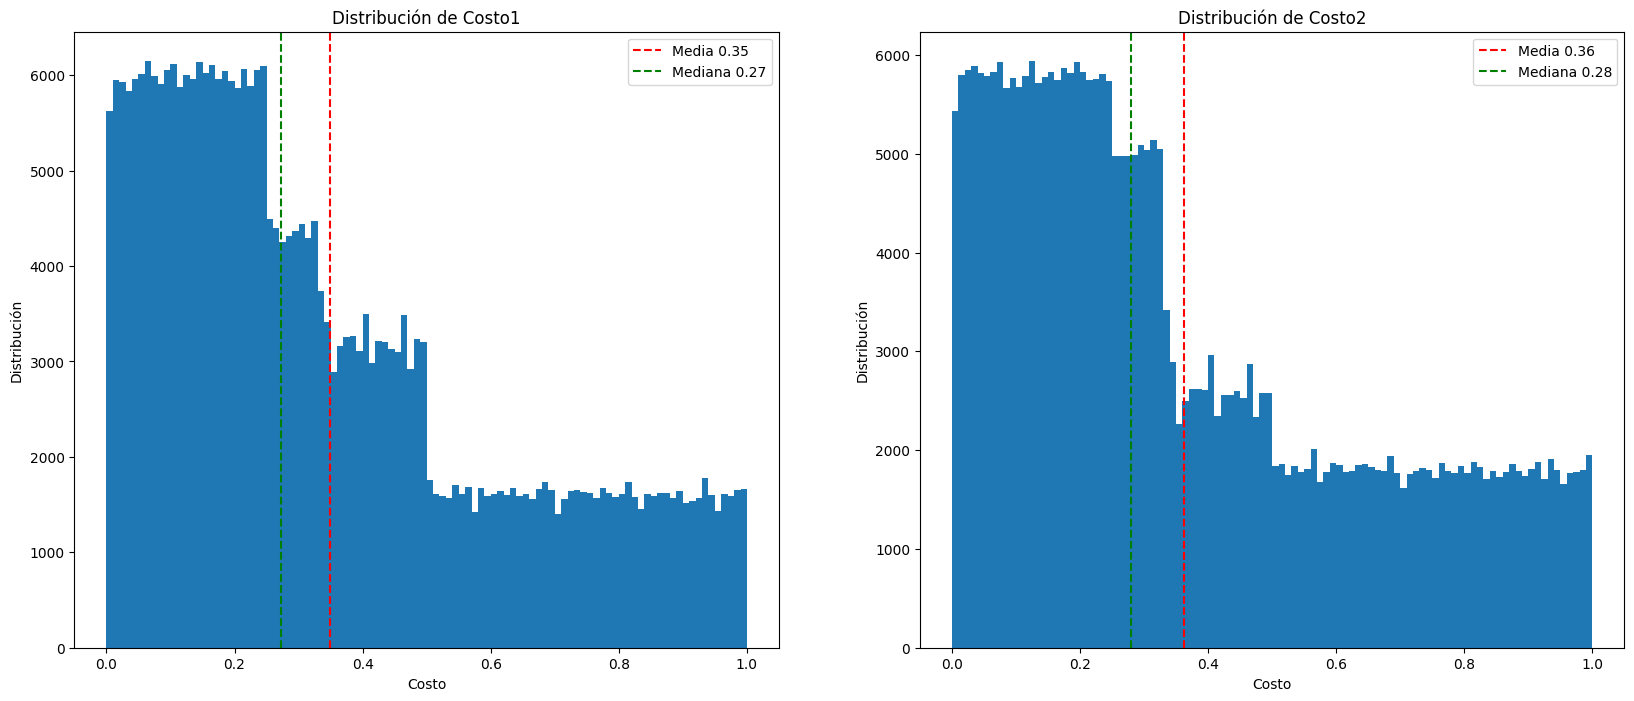

In [7]:
# Distribución Costo1
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.hist(df.Costo1, bins=100)
plt.title("Distribución de Costo1")
plt.xlabel("Costo")
plt.ylabel("Distribución")
plt.axvline(df.Costo1.mean(), label=f"Media {df.Costo1.mean():.2f}", color='red', ls='--')
plt.axvline(df.Costo1.median(), label=f"Mediana {df.Costo1.median():.2f}", color='green', ls='--')
plt.legend()

# Distribución Costo2
plt.subplot(1, 2, 2)
plt.hist(df.Costo2, bins=100)
plt.title("Distribución de Costo2")
plt.xlabel("Costo")
plt.ylabel("Distribución")
plt.axvline(df.Costo2.mean(), label=f"Media {df.Costo2.mean():.2f}", color='red', ls='--')
plt.axvline(df.Costo2.median(), label=f"Mediana {df.Costo2.median():.2f}", color='green', ls='--')
plt.legend()
plt.show()

##### Se observa sesgo positivo en ambas variables, no parecen haber posibles outliers cercanos al máximo

In [8]:
df.Topico.value_counts().sort_index()

Topico
1    36759
2    81993
3    89882
4    77929
5    33383
Name: count, dtype: int64

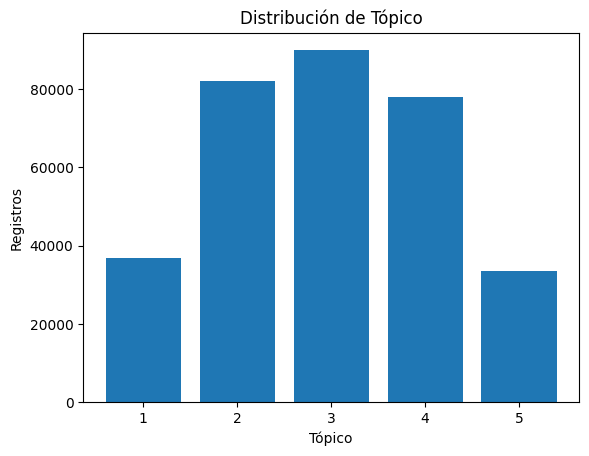

In [9]:
topico = df['Topico'].value_counts().sort_index()

plt.bar(topico.index, topico.values)
plt.title("Distribución de Tópico")
plt.xlabel("Tópico")
plt.ylabel("Registros")
plt.show()

In [10]:
df.Quincena.value_counts().sort_index()

Quincena
1      3440
2      7069
3      6977
4     17621
5     17806
6     20452
7     22957
8     12965
9     12863
10    10369
11     7842
12    10515
13    12942
14    12956
15    12755
16    13058
17    12967
18    23178
19    22763
20    13215
21    12814
22    13037
23    12764
24     6621
Name: count, dtype: int64

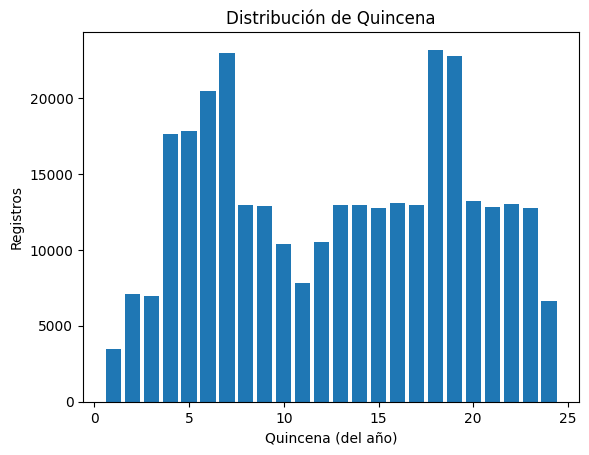

In [11]:
quincena = df.Quincena.value_counts().sort_index()

plt.bar(quincena.index, quincena.values)
plt.title("Distribución de Quincena")
plt.xlabel("Quincena (del año)")
plt.ylabel("Registros")
plt.show()

In [12]:
df.TipoProducto.value_counts().sort_index()

TipoProducto
1    31317
2    42765
3    42947
4    42802
5    42925
6    42692
7    42942
8    31556
Name: count, dtype: int64

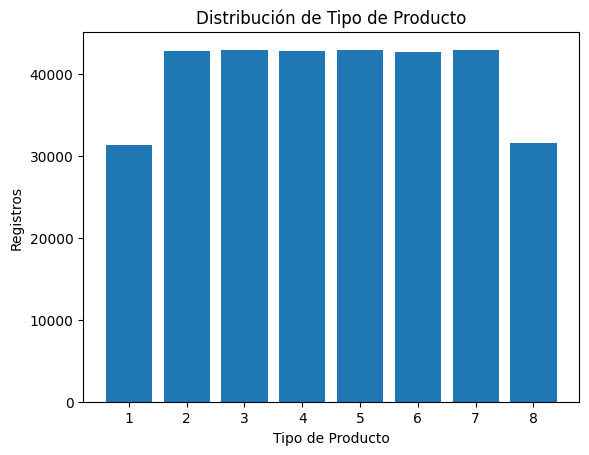

In [13]:
TipoProducto = df.TipoProducto.value_counts().sort_index()

plt.bar(TipoProducto.index, TipoProducto.values)
plt.title("Distribución de Tipo de Producto")
plt.xlabel("Tipo de Producto")
plt.ylabel("Registros")
plt.show()

#### Outliers

- Detección de outliers para las variables *Costo1* y *Costo2*.

Text(0.5, 1.0, 'Outliers Costo2')

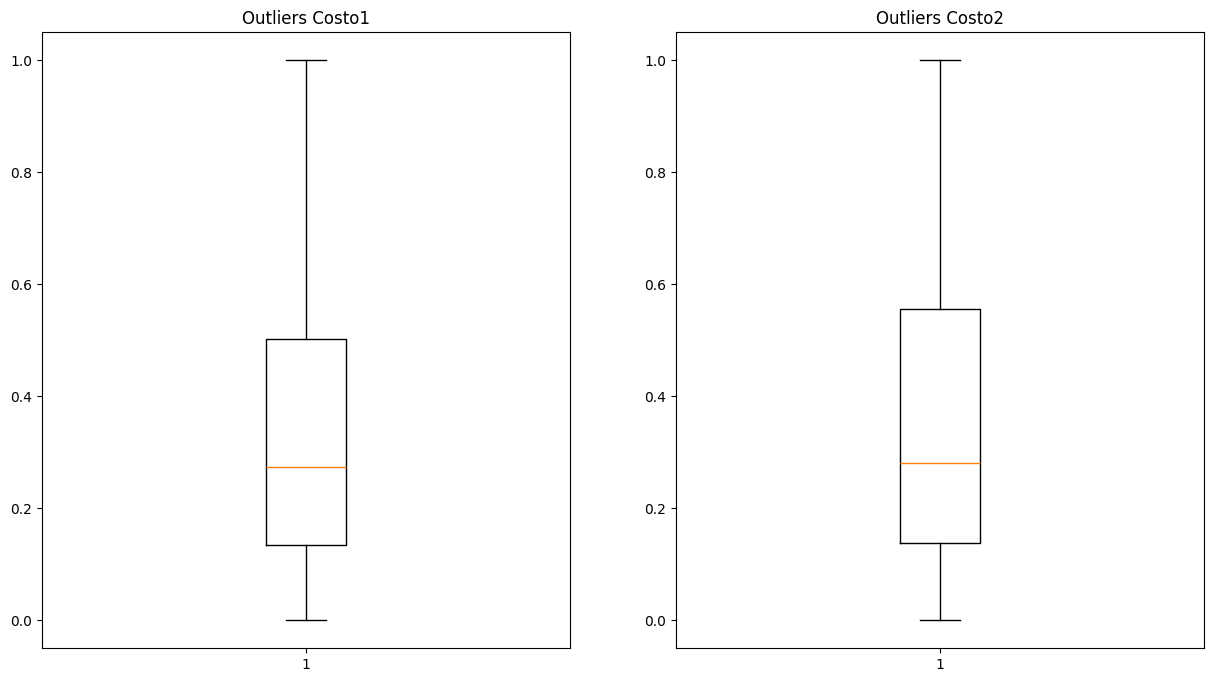

In [14]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.boxplot(df.Costo1)
plt.title("Outliers Costo1")

plt.subplot(1, 2, 2)
plt.boxplot(df.Costo2)
plt.title("Outliers Costo2")

### Conclusión: Sin Outliers

### Análisis de Target

In [15]:
df.describe()

,Costo1,Costo2,Topico,Quincena,TipoProducto
count,319946.000000,319946.000000,319946.000000,319946.000000,319946.000000
mean,0.349474,0.361730,2.966194,12.845168,4.502994
std,0.270063,0.278102,1.172870,6.493443,2.179622
min,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.134000,0.138000,2.000000,7.000000,3.000000
50%,0.273000,0.280000,3.000000,13.000000,5.000000
75%,0.502000,0.556000,4.000000,19.000000,6.000000
max,1.000000,1.000000,5.000000,24.000000,8.000000


In [16]:
df['Conversion'].describe()

count     319946
unique         2
top           No
freq      159994
Name: Conversion, dtype: object

In [17]:
df['Conversion'].value_counts()

Conversion
No    159994
Si    159952
Name: count, dtype: int64

In [18]:
target = {
    'No': 0,
    'Si': 1
}

In [19]:
df['Target'] = df.Conversion.map(target)

In [20]:
df.head()

,Costo1,Costo2,Topico,Quincena,TipoProducto,Conversion,Target
0,0.341,0.299,2,7,1,Si,1
1,0.151,0.079,2,8,1,Si,1
2,0.384,0.324,4,9,1,Si,1
3,0.200,0.192,4,9,1,Si,1
4,0.415,0.020,2,8,1,Si,1


<Axes: >

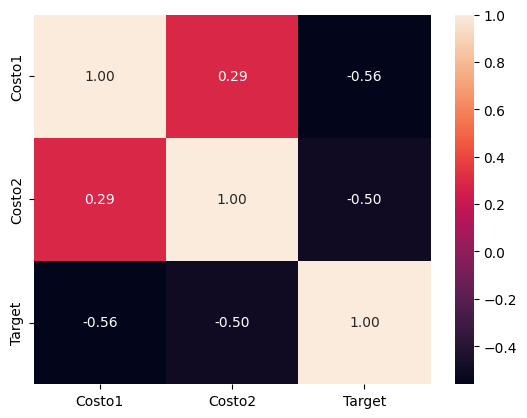

In [21]:
corr = df[['Costo1', 'Costo2', 'Target']].corr(numeric_only=True)

sns.heatmap(data=corr, annot=True, fmt=".2f")

In [22]:
df['Quincena_Bin'] = np.where(df.Quincena % 2 == 1, 1, 2)

In [23]:
df.head()

,Costo1,Costo2,Topico,Quincena,TipoProducto,Conversion,Target,Quincena_Bin
0,0.341,0.299,2,7,1,Si,1,1
1,0.151,0.079,2,8,1,Si,1,2
2,0.384,0.324,4,9,1,Si,1,1
3,0.200,0.192,4,9,1,Si,1,1
4,0.415,0.020,2,8,1,Si,1,2


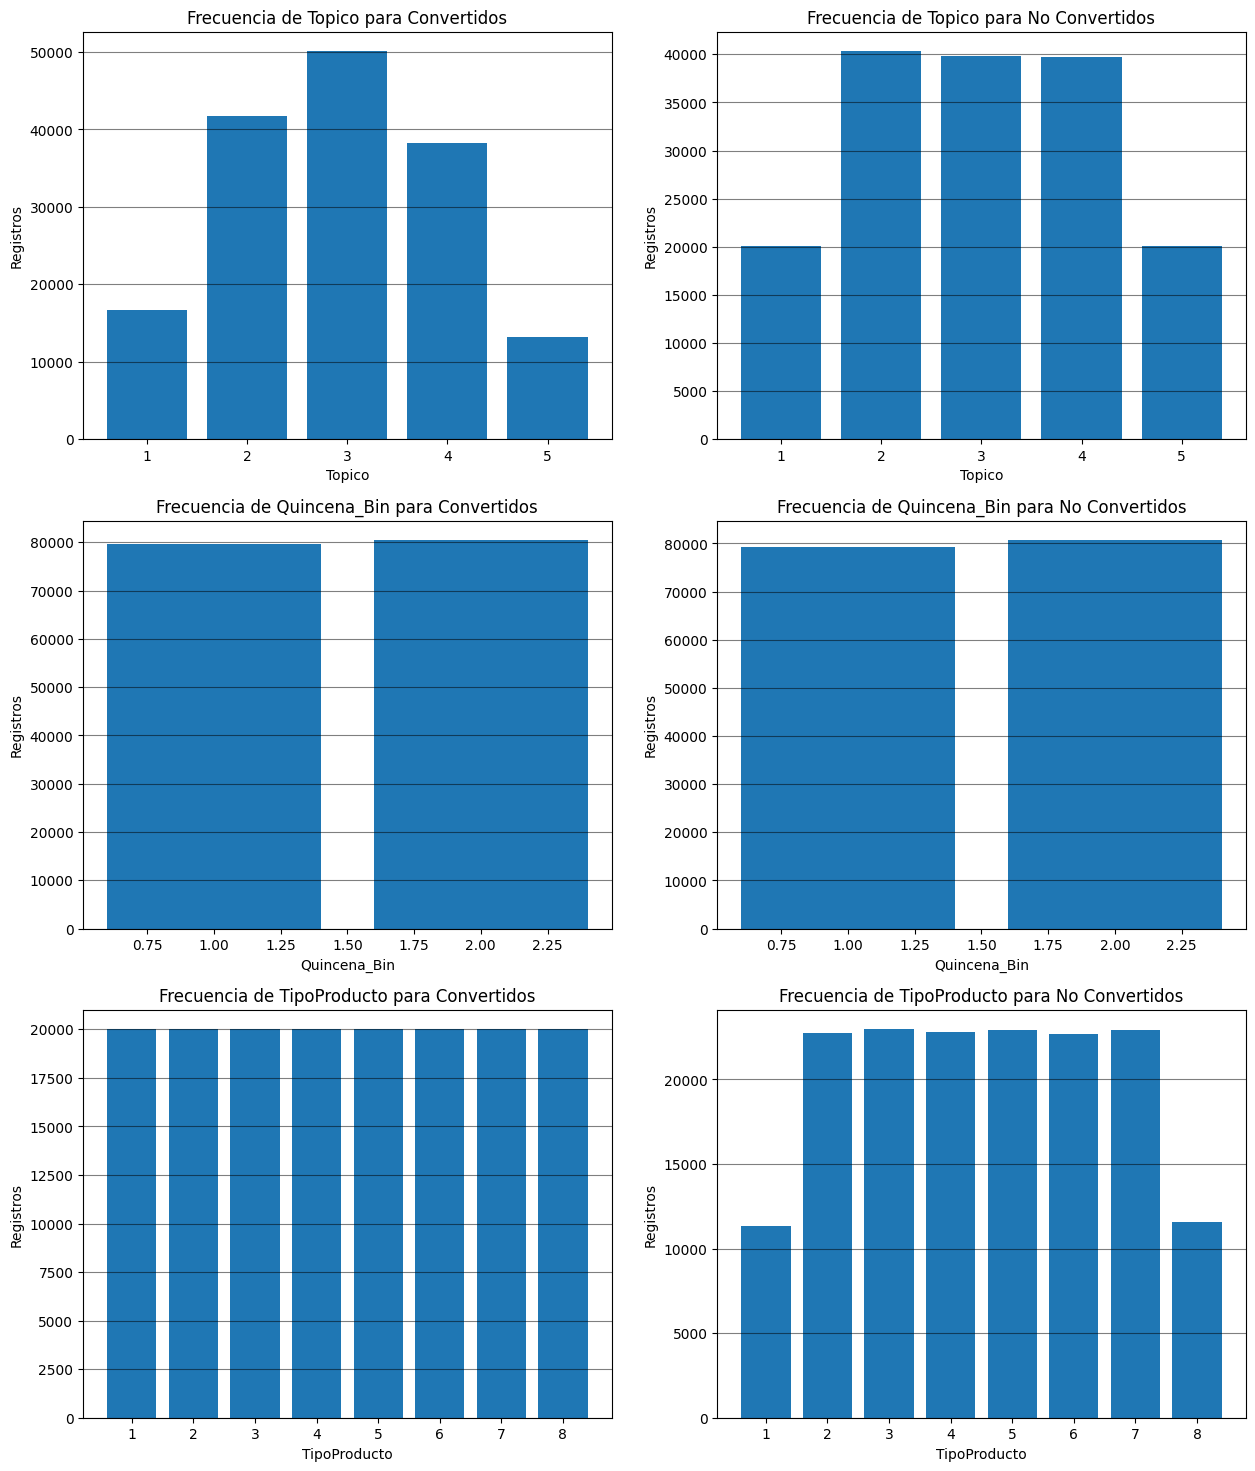

In [24]:
features = ['Topico', 'Quincena_Bin', 'TipoProducto']

plt.figure(figsize=(15, 18))
subplot = 1
for i in range(3):
    data_true = df.loc[df.Target == 1, features[i]].value_counts().sort_index()
    data_false = df.loc[df.Target == 0, features[i]].value_counts().sort_index()

    plt.subplot(3, 2, subplot)
    plt.bar(data_true.index, data_true.values)
    plt.title(f'Frecuencia de {features[i]} para Convertidos')
    plt.xlabel(features[i])
    plt.ylabel("Registros")
    plt.grid(axis='y', alpha=0.5, color='black')

    subplot += 1

    plt.subplot(3, 2, subplot)
    plt.bar(data_false.index, data_false.values)
    plt.title(f'Frecuencia de {features[i]} para No Convertidos')
    plt.xlabel(features[i])
    plt.ylabel("Registros")
    plt.grid(axis='y', alpha=0.5, color='black')

    subplot += 1
    

In [25]:
df.groupby(by='Quincena_Bin')['Target'].value_counts()

Quincena_Bin  Target
1             1         79554
              0         79336
2             0         80658
              1         80398
Name: count, dtype: int64

### Transformación de datos para modelos

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
ohEncoder = OneHotEncoder()

In [28]:
X = df[['Topico']]
topico_encode = ohEncoder.fit_transform(X)

In [29]:
topico_encode.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]], shape=(319946, 5))

In [30]:
df_topico = pd.DataFrame(
    topico_encode.toarray(),
    columns = ohEncoder.get_feature_names_out(['Topico']),
    index = df.index
)

In [31]:
df = pd.concat([df, df_topico], axis=1)

In [32]:
X = df[['TipoProducto']]
tipoProd_encode = ohEncoder.fit_transform(X)

In [33]:
tipoProd_encode.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(319946, 8))

In [34]:
df_tipoProd = pd.DataFrame(
    tipoProd_encode.toarray(),
    columns=ohEncoder.get_feature_names_out(['TipoProducto']),
    index=df.index
)

df = pd.concat([df, df_tipoProd], axis=1)

In [35]:
df.head()

,Costo1,Costo2,Topico,Quincena,TipoProducto,Conversion,Target,Quincena_Bin,Topico_1,Topico_2,...,Topico_4,Topico_5,TipoProducto_1,TipoProducto_2,TipoProducto_3,TipoProducto_4,TipoProducto_5,TipoProducto_6,TipoProducto_7,TipoProducto_8
0,0.341,0.299,2,7,1,Si,1,1,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.151,0.079,2,8,1,Si,1,2,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.384,0.324,4,9,1,Si,1,1,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.200,0.192,4,9,1,Si,1,1,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.415,0.020,2,8,1,Si,1,2,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Preparation

In [36]:
X = df.drop(['Topico', 'Quincena', 'TipoProducto', 'Conversion', 'Target'], axis=1)
y = df.Target

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [39]:
print(f"Train: {y_train.value_counts()}")
print(f"Test: {y_test.value_counts()}")

Train: Target
0    120089
1    119870
Name: count, dtype: int64
Test: Target
1    40082
0    39905
Name: count, dtype: int64


En caso de encontrar diferencias de distribución entre las clases, puedo usar el parámetro ***STRATIFY=Y*** en la función *train_test_split* para indicar que mantenga la proporción de clases. 

### K-Nearest Neighbors

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, roc_auc_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score

In [41]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    return {
        'Accuracy Score': accuracy_score(y_test, y_pred),
        'Precision Score': precision_score(y_test, y_pred),
        'Recall Score': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

In [42]:
grid = {
    "n_neighbors": [5, 7, 9, 11, 13],
    "weights": ['uniform', 'distance']
}

In [43]:
model = GridSearchCV(KNeighborsClassifier(), param_grid=grid, cv=5, return_train_score=True, n_jobs=-1)
model.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [5, 7, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_neighbors,11


In [44]:
model.best_estimator_

,n_neighbors,11
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Mejor modelo encontrado con GridSearchCV: 

- **n_neighbors**: 11
- **weights**: Uniform
- **metric**: Monkowski (default)

In [45]:
y_pred_tr = model.predict(X_train)
y_pred = model.predict(X_test)

In [46]:
print(f"Train set: {accuracy_score(y_train, y_pred_tr)}")
print(f"Test set: {accuracy_score(y_test, y_pred)}")

Train set: 0.9394188173813026
Test set: 0.9364396714466101


In [47]:
proba = model.predict_proba(X_test)[:, 1]

In [48]:
fpr, tpr, _ = roc_curve(y_test, proba)
auc = roc_auc_score(y_test, proba)

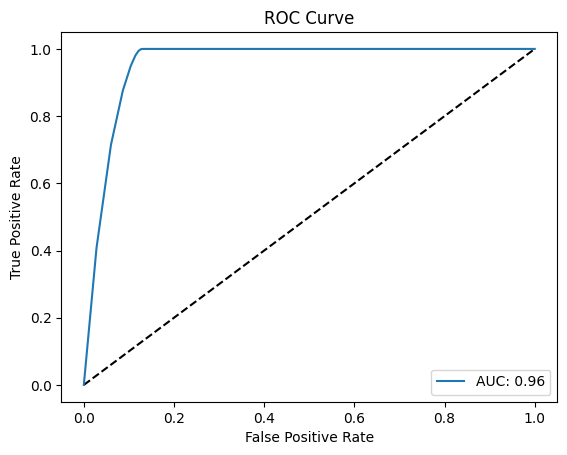

In [49]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f"AUC: {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

In [50]:
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94    120089
           1       0.89      1.00      0.94    119870

    accuracy                           0.94    239959
   macro avg       0.95      0.94      0.94    239959
weighted avg       0.95      0.94      0.94    239959



In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     39905
           1       0.89      0.99      0.94     40082

    accuracy                           0.94     79987
   macro avg       0.94      0.94      0.94     79987
weighted avg       0.94      0.94      0.94     79987



In [52]:
print(confusion_matrix(y_test, y_pred))

[[35079  4826]
 [  258 39824]]


### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

In [54]:
grid = {
    'max_depth': [5, 6, 7, 8, 9, 10, 11, 12]
}

In [55]:
depths = np.arange(1, 50, 1)

scores_train_mean = []
scores_train_std = []
scores_test_mean = []
scores_test_std = []

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth)
    tree_scores = cross_validate(tree, X_train, y_train, cv=5, n_jobs=-1, return_train_score=True)

    scores_train_mean.append(tree_scores['train_score'].mean())
    scores_train_std.append(tree_scores['train_score'].std())

    scores_test_mean.append(tree_scores['test_score'].mean())
    scores_test_std.append(tree_scores['test_score'].std())
    
    print(f"Finish depth: {depth}  --  Test Score: {tree_scores['test_score'].mean():.2f}")

scores_train_mean = np.array(scores_train_mean)
scores_train_std = np.array(scores_train_std)
scores_test_mean = np.array(scores_test_mean)
scores_test_std = np.array(scores_test_std)

Finish depth: 1  --  Test Score: 0.75
Finish depth: 2  --  Test Score: 0.85
Finish depth: 3  --  Test Score: 0.87
Finish depth: 4  --  Test Score: 0.87
Finish depth: 5  --  Test Score: 0.88
Finish depth: 6  --  Test Score: 0.90
Finish depth: 7  --  Test Score: 0.91
Finish depth: 8  --  Test Score: 0.91
Finish depth: 9  --  Test Score: 0.92
Finish depth: 10  --  Test Score: 0.92
Finish depth: 11  --  Test Score: 0.93
Finish depth: 12  --  Test Score: 0.93
Finish depth: 13  --  Test Score: 0.94
Finish depth: 14  --  Test Score: 0.94
Finish depth: 15  --  Test Score: 0.94
Finish depth: 16  --  Test Score: 0.94
Finish depth: 17  --  Test Score: 0.94
Finish depth: 18  --  Test Score: 0.94
Finish depth: 19  --  Test Score: 0.93
Finish depth: 20  --  Test Score: 0.93
Finish depth: 21  --  Test Score: 0.93
Finish depth: 22  --  Test Score: 0.93
Finish depth: 23  --  Test Score: 0.92
Finish depth: 24  --  Test Score: 0.92
Finish depth: 25  --  Test Score: 0.92
Finish depth: 26  --  Test Score: 

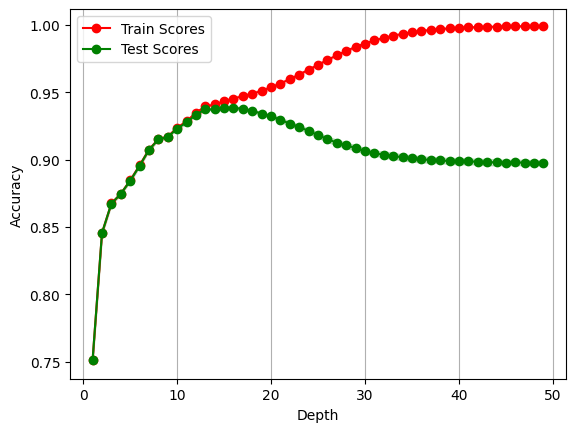

In [56]:
plt.fill_between(depths, scores_train_mean - scores_train_std, scores_train_mean + scores_train_std, alpha=0.2, color='r')
plt.fill_between(depths, scores_test_mean - scores_test_std, scores_test_mean + scores_test_std, alpha=0.2, color='g')

plt.plot(depths, scores_train_mean, 'o-', color='r', label='Train Scores')
plt.plot(depths, scores_test_mean, 'o-', color='g', label='Test Scores')

plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.grid(axis='x')
plt.legend()

In [57]:
tree_model = DecisionTreeClassifier(max_depth=13)
tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,13
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [58]:
y_pred_tr = tree_model.predict(X_train)
y_pred = tree_model.predict(X_test)

In [59]:
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94    120089
           1       0.89      1.00      0.94    119870

    accuracy                           0.94    239959
   macro avg       0.95      0.94      0.94    239959
weighted avg       0.95      0.94      0.94    239959



In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     39905
           1       0.89      1.00      0.94     40082

    accuracy                           0.94     79987
   macro avg       0.94      0.94      0.94     79987
weighted avg       0.94      0.94      0.94     79987



In [61]:
proba = tree_model.predict_proba(X_test)[:, 1]

In [62]:
fpr, tpr, _ = roc_curve(y_test, proba)
auc = roc_auc_score(y_test, proba)

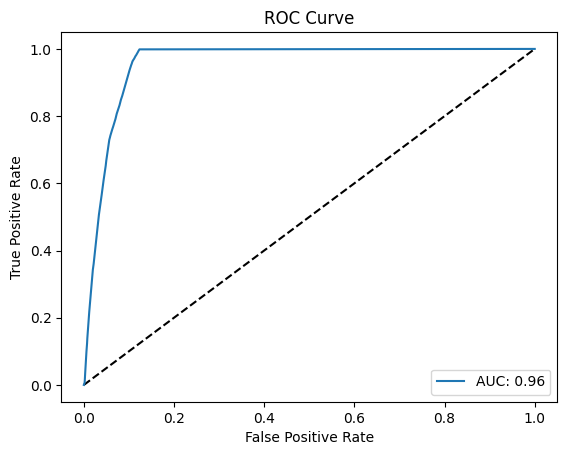

In [63]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f"AUC: {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

In [64]:
print(confusion_matrix(y_test, y_pred))

[[35002  4903]
 [  110 39972]]


## Comparación de Modelos

In [65]:
result = {}

result['KNN'] = evaluate_model(model, X_test, y_test)
result['Tree'] = evaluate_model(tree_model, X_test, y_test)

df_metrics = pd.DataFrame(result).T

df_metrics

,Accuracy Score,Precision Score,Recall Score,F1 Score
KNN,0.936440,0.891915,0.993563,0.939999
Tree,0.937327,0.890741,0.997256,0.940994


## Conclusión

- Los 2 modelos de clasificación plateados como solución mostraron resultados favorables al objetivo principal del problema.

## Almacenamiento de Modelos y DataSets finales

In [66]:
from joblib import dump

In [69]:
df.to_csv('Models/df.csv')
df_metrics.to_csv('Models/df_metrics.csv')

In [68]:
dump(model, "Models/KNN_model.joblib") # Save KNN model
dump(tree_model, "Models/Tree_model.joblib") # Save Tree model

['Models/Tree_model.joblib']